輸入立委臉書粉專內容及選舉政見資料

In [ ]:
import pandas as pd
fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

以台東縣立委劉櫂豪為例，依照月份來統計數值資料的變化

In [ ]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,link_url,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,https://www.facebook.com/junglicity/photos/a.2...,NaN,NaN,144,0,0,0,0,0,6,5


In [ ]:
liu = fb[fb.page_name == "劉櫂豪"]
liu.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,link_url,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
26691,213939351983587_2199719290072240,213939351983587,劉櫂豪,政治人物,籲司法調查普悠瑪違失 劉櫂豪要求政府記取教訓,NaN,link,https://www.facebook.com/213939351983587/posts...,2019-01-15T08:30:49+0000,2019-01-15T16:30:49,http://yt1.piee.pw/E8MVM,20190111 籲司法調查普悠瑪違失 劉櫂豪盼政府記取教訓,NaN,456,0,0,0,0,0,25,7


In [ ]:
liu[liu.created_time_taipei == max(liu.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,link_url,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
27631,213939351983587_2853758061335023,213939351983587,劉櫂豪,政治人物,明天是關鍵時刻，每一票都非常重要，請大家一定要去投票！\n櫂豪拜託大家，台東人要支持台東子弟...,NaN,video,https://www.facebook.com/213939351983587/posts...,2020-01-10T13:59:27+0000,2020-01-10T21:59:27,https://www.facebook.com/ChaoHaoLiu/videos/627...,支持台東子弟,NaN,2106,0,0,0,0,0,50,13


In [ ]:
liu[liu.created_time_taipei == min(liu.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,link_url,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
26706,213939351983587_2182584481785721,213939351983587,劉櫂豪,政治人物,今天有四位長輩對蔡總統發表公開信。然而，民進黨由誰代表出馬2020總統選舉，有黨內機制可決定...,NaN,photo,https://www.facebook.com/213939351983587/posts...,2019-01-03T05:20:39+0000,2019-01-03T13:20:39,https://www.facebook.com/tsaiingwen/photos/a.3...,蔡英文 Tsai Ing-wen,我知道有幾位老前輩寫信給我，不過這個時刻，向世界表達台灣人的心聲更重要。昨天我回應中國國家主...,871,0,0,0,0,0,40,12


In [ ]:
liu['new_date'] = pd.to_datetime(liu['created_time_taipei']).dt.date
liu['month_year'] = pd.to_datetime(liu['new_date']).dt.to_period('M')
liu.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,link_url,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26691,213939351983587_2199719290072240,213939351983587,劉櫂豪,政治人物,籲司法調查普悠瑪違失 劉櫂豪要求政府記取教訓,NaN,link,https://www.facebook.com/213939351983587/posts...,2019-01-15T08:30:49+0000,2019-01-15T16:30:49,http://yt1.piee.pw/E8MVM,20190111 籲司法調查普悠瑪違失 劉櫂豪盼政府記取教訓,NaN,456,0,0,0,0,0,25,7,2019-01-15,2019-01


In [ ]:
results = liu.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
month_year,,,,,,,,,
2019-01,10696967599179356,18830,0,0,0,0,0,1114,527
2019-02,10055149543228592,17802,0,0,0,0,0,932,497
2019-03,15189693990834704,27813,0,0,0,0,0,1501,713
2019-04,20324238438440816,40235,0,0,0,0,0,1675,813
2019-05,19682420382490052,44810,0,0,0,0,0,2333,693
2019-06,19040602326539288,67052,0,0,0,0,0,3592,1669
2019-07,15403633342818292,47084,0,0,0,0,0,2179,990
2019-08,21821813902325932,95526,0,0,0,0,0,3520,1124
2019-09,19896359734473640,58806,0,0,0,0,0,2260,825


In [ ]:
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,2019-01,10696967599179356,18830,0,0,0,0,0,1114,527
1,2019-02,10055149543228592,17802,0,0,0,0,0,932,497
2,2019-03,15189693990834704,27813,0,0,0,0,0,1501,713
3,2019-04,20324238438440816,40235,0,0,0,0,0,1675,813
4,2019-05,19682420382490052,44810,0,0,0,0,0,2333,693
5,2019-06,19040602326539288,67052,0,0,0,0,0,3592,1669
6,2019-07,15403633342818292,47084,0,0,0,0,0,2179,990
7,2019-08,21821813902325932,95526,0,0,0,0,0,3520,1124
8,2019-09,19896359734473640,58806,0,0,0,0,0,2260,825
9,2019-10,17115148158686996,58303,0,0,0,0,0,2251,802


In [ ]:
results['newhead'].map(str)

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: newhead, dtype: object

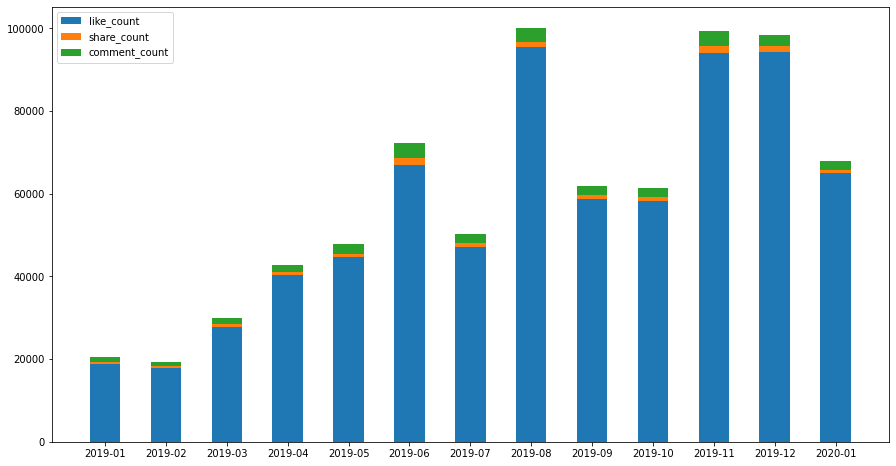

In [ ]:
import matplotlib.pyplot as plt

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])

ax.legend()

plt.show()

第十屆立委選舉日，民國109年（2020年）1月11號舉行，選前兩個月發文讚數高，很合理，但2019年8月讚數高的原因是甚麼？

In [ ]:
August = liu[liu.month_year == "2019-08"]

In [ ]:
results_august = August.groupby('new_date').sum()
results_august

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
new_date,,,,,,,,,
2019-08-01,427878703967174,1263,0,0,0,0,0,59,20
2019-08-02,641818055950761,2092,0,0,0,0,0,81,17
2019-08-03,2995150927770218,19810,0,0,0,0,0,818,358
2019-08-04,641818055950761,3646,0,0,0,0,0,89,39
2019-08-05,641818055950761,2210,0,0,0,0,0,71,18
2019-08-06,855757407934348,3973,0,0,0,0,0,129,40
2019-08-07,855757407934348,12203,0,0,0,0,0,512,56
2019-08-08,641818055950761,3128,0,0,0,0,0,114,20
2019-08-09,427878703967174,1134,0,0,0,0,0,44,29


In [ ]:
results_august.index.name = 'newhead'
results_august.reset_index(inplace=True)
results_august

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,2019-08-01,427878703967174,1263,0,0,0,0,0,59,20
1,2019-08-02,641818055950761,2092,0,0,0,0,0,81,17
2,2019-08-03,2995150927770218,19810,0,0,0,0,0,818,358
3,2019-08-04,641818055950761,3646,0,0,0,0,0,89,39
4,2019-08-05,641818055950761,2210,0,0,0,0,0,71,18
5,2019-08-06,855757407934348,3973,0,0,0,0,0,129,40
6,2019-08-07,855757407934348,12203,0,0,0,0,0,512,56
7,2019-08-08,641818055950761,3128,0,0,0,0,0,114,20
8,2019-08-09,427878703967174,1134,0,0,0,0,0,44,29
9,2019-08-10,641818055950761,2441,0,0,0,0,0,82,13


No handles with labels found to put in legend.


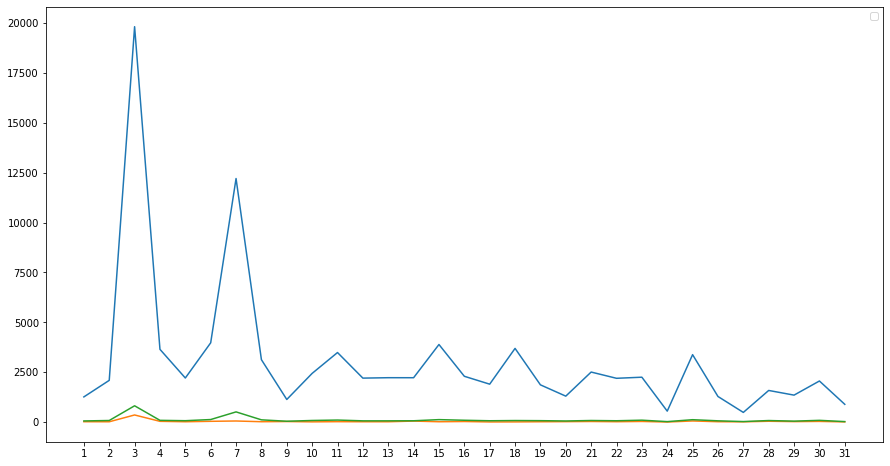

In [ ]:
labels = [str(i) for i in range(1,32)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_august['like_count'])
ax.plot(labels, results_august['share_count'])
ax.plot(labels, results_august['comment_count'])

ax.legend()

plt.show()

2019年8月3日和8月7日的文章，內容為何會得到這麼高的關注

In [ ]:
liu['new_date']=liu['new_date'].map(str)
liu[liu['new_date'] == "2019-08-03"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,link_url,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
27242,213939351983587_2569349569872082,213939351983587,劉櫂豪,政治人物,晚上，櫂豪邀請小英總統來到森林公園，參加pasiwali原住民族音樂節，歡迎大家來台東！,劉櫂豪的直播影片。,video,https://www.facebook.com/ChaoHaoLiu/videos/256...,2019-08-03T11:58:54+0000,2019-08-03T19:58:54,https://www.facebook.com/ChaoHaoLiu/videos/256...,NaN,NaN,402,0,0,0,0,0,14,5,2019-08-03,2019-08
27243,213939351983587_482968602268436,213939351983587,劉櫂豪,政治人物,晚上，櫂豪邀請小英總統來到森林公園，參加Pasiwali音樂節！\n歡迎大家來台東！,劉櫂豪的直播影片。,video,https://www.facebook.com/ChaoHaoLiu/videos/482...,2019-08-03T11:55:28+0000,2019-08-03T19:55:28,https://www.facebook.com/ChaoHaoLiu/videos/482...,NaN,NaN,581,0,0,0,0,0,14,5,2019-08-03,2019-08
27244,213939351983587_2449142702010830,213939351983587,劉櫂豪,政治人物,晚上，櫂豪邀請小英總統來到森林公園，參加pasiwali原住民族音樂節，欣賞地主隊都蘭部落S...,劉櫂豪的直播影片。,video,https://www.facebook.com/ChaoHaoLiu/videos/244...,2019-08-03T11:41:56+0000,2019-08-03T19:41:56,https://www.facebook.com/ChaoHaoLiu/videos/244...,NaN,NaN,579,0,0,0,0,0,16,12,2019-08-03,2019-08
27245,213939351983587_2078867502408889,213939351983587,劉櫂豪,政治人物,晚上，櫂豪邀請小英總統來到森林公園，參加pasiwali原住民族音樂節，歡迎大家來台東！,劉櫂豪的直播影片。,video,https://www.facebook.com/ChaoHaoLiu/videos/207...,2019-08-03T10:58:29+0000,2019-08-03T18:58:29,https://www.facebook.com/ChaoHaoLiu/videos/207...,NaN,NaN,718,0,0,0,0,0,27,7,2019-08-03,2019-08
27246,213939351983587_2416974725203291,213939351983587,劉櫂豪,政治人物,櫂豪與小英總統一同欣賞卑南鄉知本溫泉熱氣球光雕活動！,劉櫂豪的直播影片。,video,https://www.facebook.com/ChaoHaoLiu/videos/241...,2019-08-03T10:15:02+0000,2019-08-03T18:15:02,https://www.facebook.com/ChaoHaoLiu/videos/241...,NaN,NaN,1079,0,0,0,0,0,38,35,2019-08-03,2019-08
27247,213939351983587_2134543036845758,213939351983587,劉櫂豪,政治人物,櫂豪邀請小英總統來到知本溫泉，參加卑南鄉熱氣球光雕活動，促進台東觀光，歡迎大家來台東！,劉櫂豪的直播影片。,video,https://www.facebook.com/ChaoHaoLiu/videos/213...,2019-08-03T10:08:17+0000,2019-08-03T18:08:17,https://www.facebook.com/ChaoHaoLiu/videos/213...,NaN,NaN,1836,0,0,0,0,0,82,19,2019-08-03,2019-08
27248,213939351983587_2234240020222156,213939351983587,劉櫂豪,政治人物,櫂豪邀請小英總統來到卑南鄉熱氣球光雕活動，發放野餐墊！,劉櫂豪的直播影片。,video,https://www.facebook.com/ChaoHaoLiu/videos/223...,2019-08-03T09:52:27+0000,2019-08-03T17:52:27,https://www.facebook.com/ChaoHaoLiu/videos/223...,NaN,NaN,661,0,0,0,0,0,18,7,2019-08-03,2019-08
27249,213939351983587_996380684086750,213939351983587,劉櫂豪,政治人物,櫂豪與小英總統關心太麻里農業，品嘗大目釋迦！,劉櫂豪的直播影片。,video,https://www.facebook.com/ChaoHaoLiu/videos/996...,2019-08-03T08:12:51+0000,2019-08-03T16:12:51,https://www.facebook.com/ChaoHaoLiu/videos/996...,NaN,NaN,1758,0,0,0,0,0,74,36,2019-08-03,2019-08
27250,213939351983587_624407694734104,213939351983587,劉櫂豪,政治人物,下午，櫂豪邀請小英總統來到釋迦園，關心太麻里農業,劉櫂豪的直播影片。,video,https://www.facebook.com/ChaoHaoLiu/videos/624...,2019-08-03T07:54:29+0000,2019-08-03T15:54:29,https://www.facebook.com/ChaoHaoLiu/videos/624...,NaN,NaN,865,0,0,0,0,0,27,10,2019-08-03,2019-08
27251,213939351983587_2112379898872171,213939351983587,劉櫂豪,政治人物,櫂豪邀請小英總統來到建和，慰問陳爸阿朗的家人，勉勵孩子的書屋夥伴！,劉櫂豪的直播影片。,video,https://www.facebook.com/ChaoHaoLiu/videos/211...,2019-08-03T07:17:39+0000,2019-08-03T15:17:39,https://www.facebook.com/ChaoHaoLiu/videos/211...,NaN,NaN,3170,0,0,0,0,0,98,39,2019-08-03,2019-08


In [ ]:
temp = liu[liu['new_date'] == "2019-08-07"]
temp[temp.like_count == max(temp.like_count)]

,post_id,page_id,page_name,page_category,message,...,wow_count,comment_count,share_count,new_date,month_year
27228,213939351983587_2528136710563828,213939351983587,劉櫂豪,政治人物,那一年，我追的女孩😘\n\n櫂豪政大法律系的畢業典禮上🎓 子煊送花給我🌹 青春的我們戀愛❤️\n\n今天七夕情人節，你有收到我和子煊的青春照嗎？如果沒有，趕快加我的line哦😄\n\n劉櫂豪 Line & IG\nLine： https://tinyurl.com/y59pyy2e\nLine ID 帳號：@pss4210h\nIG：ahao_liu,...,0,360,28,2019-08-07,2019-08


In [ ]:
temp[temp.like_count == min(temp.like_count)]

,post_id,page_id,page_name,page_category,message,...,wow_count,comment_count,share_count,new_date,month_year
27231,213939351983587_2523957907648375,213939351983587,劉櫂豪,政治人物,劉櫂豪爭取1.18億元 改善卑南東37、38、55線道路,...,0,20,5,2019-08-07,2019-08


2019-08-03 台東熱氣球季小英總統蒞臨

2019-08-07 情人節放閃文 + 爭取台東交通改善

2019-08-27 發文是八月中獲得關注最少的，為什麼

In [ ]:
liu[liu['new_date'] == "2019-08-27"]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,link_url,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
27270,213939351983587_2554334231277409,213939351983587,劉櫂豪,政治人物,劉櫂豪爭取900萬\n改善東河鄉泰源村中興地區無自來水供水,NaN,link,https://www.facebook.com/213939351983587/posts...,2019-08-27T00:00:00+0000,2019-08-27T08:00:00,https://tinyurl.com/yybbbtzk,台東泰源幽谷15戶近百人將享有自來水 | 地方 | 中央社 CNA,台東縣東河鄉泰源村內15戶人家，長久以來自行引接山泉水，遇乾季缺水，或颱風天又會破壞水源地，...,486,0,0,0,0,0,28,14,2019-08-27,2019-08


2019-02 發文內容獲得的關注最少，為什麼

In [ ]:
results_feb = liu[liu.month_year == "2019-02"].groupby('new_date').sum()
results_feb[results_feb.like_count == min(results_feb.like_count)]

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
new_date,,,,,,,,,
2019-02-11,213939351983587,218,0,0,0,0,0,17,13


In [ ]:
pd.set_option('display.max_colwidth', None)
showlink = liu[liu.new_date == "2019-02-11"].permalink.to_string()
print(showlink)

26757    https://www.facebook.com/213939351983587/posts/2238392939538208/


In [ ]:
print(politics[politics.姓名 == "劉櫂豪"].政見.to_string())

74    一、持續配合縣政府、議會、鄉鎮市公所、代表會向中央爭取年度施政計畫預算補助。二、問政、選民服務不分黨派、不分族群、台東優先。三、交通建設：1.督促南迴鐵路電氣化於109年完工，台東高雄車程90分鐘。2.加速花東、南迴鐵路雙軌化計畫，解決一票難求的問題。3.督促交通部改善台鐵售票系統，持續督促連續假期東部交通疏運。4.爭取大武漁港、長濱漁港整體改善，徹底解決淤砂問題。5.督促台九線縱谷段改善計畫。6.督促太平溪左岸路堤共構計畫。四、文化環境觀光：1.爭取建置自由行旅客友善觀光環境。2.保存在地歷史建築，提升台東多元文化特色及城鄉景觀。3.爭取八仙洞與水母 ㆜橋列為世界遺產潛力點。4.推動非核家園，堅定拒絕台東設核廢料最終儲置場。5.爭取中央政策支持，鼓勵綠色能源產業在台東發展。6.持續推動花東各段自行車道連結，建置花東鐵馬國道網。五、醫療政策：1.爭取設立醫療專責基金，改善醫療資源不足問題。2.爭取中央增購加護型救護車及居家看護車。3.強化緊急傷病空中運送機制及醫療協助。4.爭取醫護相關學系公費生名額，解決偏鄉長期醫療資源缺乏問題。六、教育政策：1.推動台東設置國家 及高地訓練中心，成為培養體壇人才的搖籃。2.協助縮短城鄉教學資源差距，保障學童受教權，落實教育正義。3.協助台東農工恢復獨立招生，督促教育部完善台東技職教育體系。七、在地產業：1.推動農產品外銷。2.爭取農林漁牧業產品運輸費用補貼。3.爭取健全災害農損補助程序。4.督促開發海洋深層水產業。5.加強台東各溫泉區基礎建設。6.督促中央檢討公有土地政策，研擬推動「新耕者有其田」。7.爭取設置養魚漁業專區。八、改善警察、消防工作環境，提升警消工作服務。九、爭取婦幼、勞工、農民、老人、身障、新住民之權益。十、持續行動服務專車趴趴GO，減輕鄉親舟車勞頓辛苦。
